# Logit Orders

**One Star**
- Run a logistic regression to predict `dim_is_one_star` on the explaning variables of your choice.
- Which variables have higher impact on dim_is_one_star reviews?
- How do you interpret results? 

**Five Star**

- Run a logistic regression to predict `dim_is_five_star` on the explaning variables of your choice.
- Which variables have higher impact on dim_is_one_star reviews?
- Do you notive differences with One Star?
- How do you interpret results? 

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
from olist.order import Order
orders = Order().get_training_data()

## Analysis

In [5]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer'],
      dtype='object')

/Users/brunolajoie/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/brunolajoie/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/brunolajoie/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


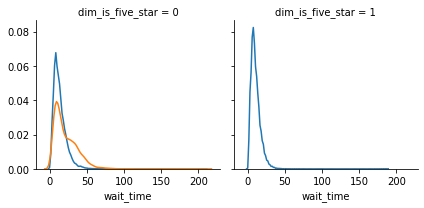

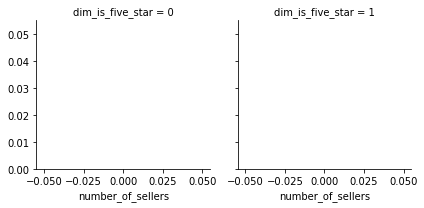

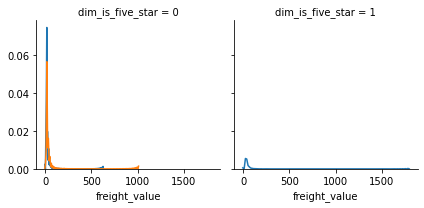

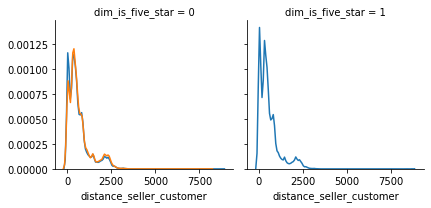

In [6]:
# Plot distribution graph per category
for var in [
    "wait_time",
    "number_of_sellers",
    "freight_value",
    "distance_seller_customer",
]:
    g = sns.FacetGrid(orders, hue="dim_is_one_star", col="dim_is_five_star")
    g.map(sns.kdeplot, var)

## One Star logit

In [5]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer'],
      dtype='object')

In [6]:
# Standardize
def standardize(df, columns):
    for c in columns:
        df[c] = (df[c] - df[c].mean()) / df[c].std()
columns = ['wait_time', "delay_vs_expected", "distance_seller_customer", "price", "freight_value"]
standardize(orders, columns)

In [13]:
logit = smf.logit(
    formula='dim_is_one_star ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + distance_seller_customer', 
    data=orders
).fit()

Optimization terminated successfully.
         Current function value: 0.279569
         Iterations 7


In [14]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:        dim_is_one_star   No. Observations:                96510
Model:                          Logit   Df Residuals:                    96503
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Feb 2020   Pseudo R-squ.:                  0.1435
Time:                        16:13:44   Log-Likelihood:                -26981.
converged:                       True   LL-Null:                       -31503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.3867      0.064    -68.305      0.000      -4.513      -4.261
wait_time                    0.7137      0.017     42.683      0.000       0.681       0.

In [15]:
# Interpreting the coefs for "number_of_sellers"
import math
math.exp(1.46)

4.305959528345206

If we add one seller to an order, then the odds of getting a 1-start review is multiplied by 4.3!

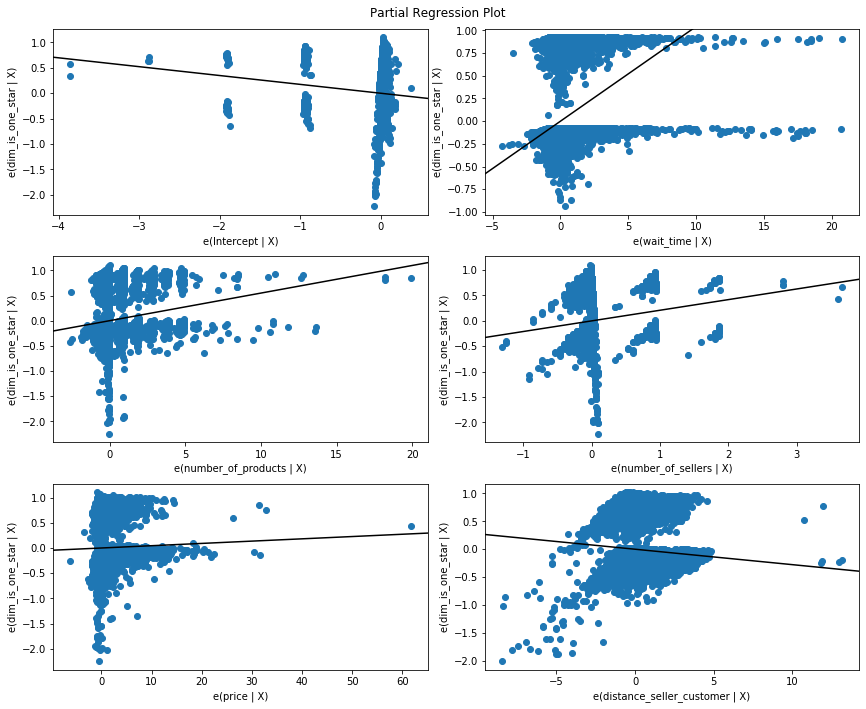

In [9]:
# Plot partial residual plots to "visualize" these coefficients and their uncertainty
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(logit, fig=fig)

### Five Star

In [10]:
logit_2 = smf.logit(formula='dim_is_five_star ~ wait_time + number_of_products + number_of_sellers + price + distance_seller_customer', 
                  data=orders).fit()

Optimization terminated successfully.
         Current function value: 0.639546
         Iterations 5


In [11]:
print(logit_2.summary())

                           Logit Regression Results                           
Dep. Variable:       dim_is_five_star   No. Observations:                96510
Model:                          Logit   Df Residuals:                    96504
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Feb 2020   Pseudo R-squ.:                 0.05564
Time:                        15:36:35   Log-Likelihood:                -61723.
converged:                       True   LL-Null:                       -65359.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.8364      0.062     29.391      0.000       1.714       1.959
wait_time                   -0.6684      0.009    -70.535      0.000      -0.687      -0.

In [ ]:
# Logit Orders

**One Star**
- Run a logistic regression to predict `dim_is_one_star` on the explaning variables of your choice.
- Which variables have higher impact on dim_is_one_star reviews?
- How do you interpret results? 

**Five Star**

- Run a logistic regression to predict `dim_is_five_star` on the explaning variables of your choice.
- Which variables have higher impact on dim_is_one_star reviews?
- Do you notive differences with One Star?
- How do you interpret results? 

# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from olist.order import Order
orders = Order().get_training_data()

### One Star

orders.columns

# Standardize
def standardize(df, columns):
    for c in columns:
        df[c] = (df[c] - df[c].mean()) / df[c].std()
columns = ['wait_time', "delay_vs_expected", "distance_seller_customer", "price", "freight_value"]
standardize(orders, columns)

logit = smf.logit(
    formula='dim_is_one_star ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + distance_seller_customer', 
    data=orders
).fit()

print(logit.summary())

# Interpreting the coefs for "number_of_sellers"
import math
math.exp(1.46)

If we add one seller to an order, then the odds of getting a 1-start review is multiplied by 4.3!

# Plot partial residual plots to "visualize" these coefficients and their uncertainty
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(logit, fig=fig)

### Five Star

logit_2 = smf.logit(formula='dim_is_five_star ~ wait_time + number_of_products + number_of_sellers + price + distance_seller_customer', 
                  data=orders).fit()

print(logit_2.summary())